In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "auto"
os.environ["TF_NUM_INTEROP_THREADS"] = "auto"
os.environ["TF_NUM_INTRAOP_THREADS"] = "auto"

import tensorflow as tf

from tensorflow.config import threading

tf.config.threading.set_intra_op_parallelism_threads(0)  
tf.config.threading.set_inter_op_parallelism_threads(0)

print("Intra-op threads:", threading.get_intra_op_parallelism_threads())
print("Inter-op threads:", threading.get_inter_op_parallelism_threads())

Intra-op threads: 0
Inter-op threads: 0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

file_path = 'train_dataset.csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['url', 'label', 'source','url_entropy', 
    'url_hamming_1', 'url_hamming_00', 'url_hamming_10', 'url_hamming_01', 
    'url_hamming_11', 'url_2bentropy', 'url_3bentropy','url_count_sensitive_financial_words', 
    'url_count_sensitive_words', 'url_nunique_chars_ratio','path_count_no_of_embed','path_has_any_sensitive_words','path_count_nonascii','tld_is_sus','pdomain_min_distance','subdomain_len', 'subdomain_count_dot']) 
y = data['label']

print(X.head())
print(y.head())


   url_has_login  url_has_client  url_has_server  url_has_admin  url_has_ip  \
0              0               0               0              0           0   
1              0               0               0              0           0   
2              0               0               0              0           0   
3              0               0               0              1           0   
4              0               0               0              0           0   

   url_isshorted  url_len  url_count_dot  url_count_https  url_count_http  \
0              0       34              1                0               0   
1              0       16              1                0               0   
2              0       35              3                0               0   
3              0       37              2                0               0   
4              0       12              2                0               0   

   ...  path_has_upperdir  query_len  query_count_components  

In [ ]:
categorical_cols = ['tld'] 
numerical_cols = [col for col in X.columns if col not in categorical_cols]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le 

scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessed Data:")
print(X_train.head())


Preprocessed Data:
         url_has_login  url_has_client  url_has_server  url_has_admin  \
1037208            0.0             0.0             0.0            0.0   
1883129            0.0             0.0             0.0            0.0   
1983136            0.0             0.0             0.0            0.0   
2408665            0.0             0.0             0.0            0.0   
5629197            0.0             0.0             0.0            0.0   

         url_has_ip  url_isshorted   url_len  url_count_dot  url_count_https  \
1037208         0.0            0.0  0.001549       0.004739              0.0   
1883129         0.0            0.0  0.002026       0.004739              0.0   
1983136         0.0            0.0  0.001192       0.004739              0.0   
2408665         0.0            0.0  0.001907       0.004739              0.0   
5629197         0.0            0.0  0.002145       0.009479              0.0   

         url_count_http  ...  path_has_upperdir  query_len  \

In [8]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if len(tf.config.list_physical_devices('GPU')) > 0:
    gpu_device = tf.config.list_physical_devices('GPU')[0]
    tf.config.experimental.set_memory_growth(gpu_device, True)
else:
    print("GPU not available, using CPU.")

Num GPUs Available:  0
GPU not available, using CPU.


In [ ]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
134577/134577 ━━━━━━━━━━━━━━━━━━━━ 133s 981us/step - accuracy: 0.7840 - loss: 0.6646 - val_accuracy: 0.7899 - val_loss: 0.5133
Epoch 2/50
134577/134577 ━━━━━━━━━━━━━━━━━━━━ 134s 996us/step - accuracy: 0.7893 - loss: 0.5142 - val_accuracy: 0.7899 - val_loss: 0.5132
Epoch 3/50
134577/134577 ━━━━━━━━━━━━━━━━━━━━ 133s 987us/step - accuracy: 0.7897 - loss: 0.5136 - val_accuracy: 0.7899 - val_loss: 0.5132
Epoch 4/50
134577/134577 ━━━━━━━━━━━━━━━━━━━━ 131s 976us/step - accuracy: 0.7897 - loss: 0.5136 - val_accuracy: 0.7899 - val_loss: 0.5137
Epoch 5/50
134577/134577 ━━━━━━━━━━━━━━━━━━━━ 132s 981us/step - accuracy: 0.7896 - loss: 0.5139 - val_accuracy: 0.7899 - val_loss: 0.5134
Epoch 6/50
134577/134577 ━━━━━━━━━━━━━━━━━━━━ 133s 984us/step - accuracy: 0.7898 - loss: 0.5135 - val_accuracy: 0.7899 - val_loss: 0.5133
Epoch 7/50
134577/134577 ━━━━━━━━━━━━━━━━━━━━ 132s 981us/step - accuracy: 0.7899 - loss: 0.5133 - val_accuracy: 0.7898 - val_loss: 0.5132
Epoch 8/50
134577/134577 ━━━━━━━━━

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


42056/42056 ━━━━━━━━━━━━━━━━━━━━ 25s 584us/step - accuracy: 0.8364 - loss: 0.3956
Test Accuracy: 83.64%


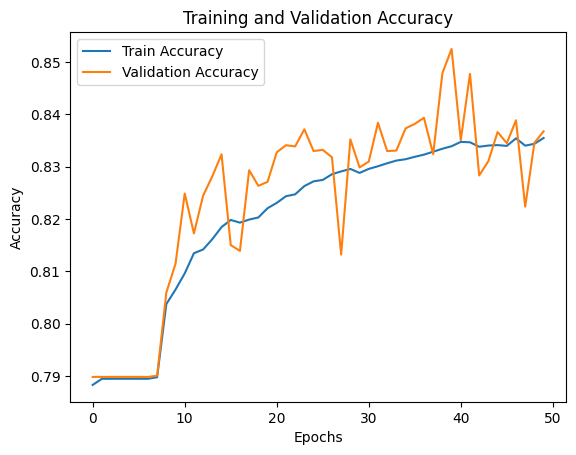

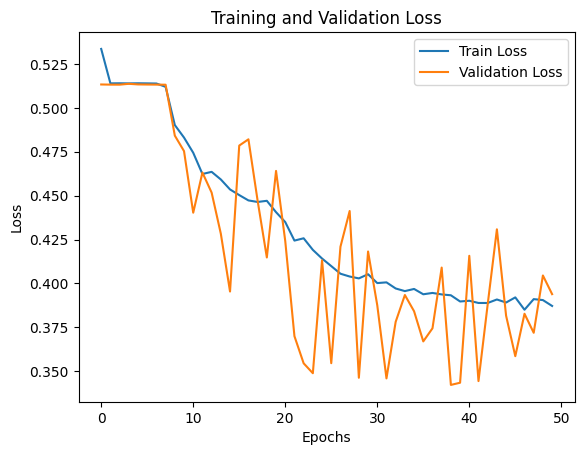

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save('url_malicious_detection_model2.h5')
print("Model saved successfully!")


Model saved successfully!


In [39]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [38]:
columnss = [
    'url_has_login', 'url_has_client', 'url_has_server', 
    'url_has_admin', 'url_has_ip', 'url_isshorted', 'url_len', 'url_count_dot', 
    'url_count_https', 'url_count_http', 'url_count_perc', 'url_count_hyphen', 
    'url_count_www', 'url_count_atrate', 'url_count_hash', 'url_count_semicolon', 
    'url_count_underscore', 'url_count_ques', 'url_count_equal', 'url_count_amp', 
    'url_count_letter', 'url_count_digit',  
    'path_len', 
    'path_count_no_of_dir', 'path_count_zero', 
    'path_count_pertwent',  'path_count_lower', 
    'path_count_upper',  'path_has_singlechardir', 
    'path_has_upperdir', 'query_len', 'query_count_components', 'pdomain_len', 
    'pdomain_count_hyphen', 'pdomain_count_atrate', 'pdomain_count_non_alphanum', 
    'pdomain_count_digit', 'tld_len', 'tld',  
    
]

print(X.iloc[0])



url_has_login                   0
url_has_client                  0
url_has_server                  0
url_has_admin                   0
url_has_ip                      0
url_isshorted                   0
url_len                        34
url_count_dot                   1
url_count_https                 0
url_count_http                  0
url_count_perc                  0
url_count_hyphen                1
url_count_www                   0
url_count_atrate                0
url_count_hash                  0
url_count_semicolon             0
url_count_underscore            0
url_count_ques                  0
url_count_equal                 0
url_count_amp                   0
url_count_letter               31
url_count_digit                 0
path_len                        4
path_count_no_of_dir            1
path_count_zero                 0
path_count_pertwent             0
path_count_lower               31
path_count_upper                0
path_has_singlechardir          0
path_has_upper